# Module optimize in scipy
[Marjolein Heidotting, Barbara Paetsch; April 2020]

*Abstract*<br>
2 demos of two different functions in scipy.optimize, dealing with constraint and non-constraint one- and multivariable optimization problems


## Introduction
similiar to some modules in numpy, but numpy can only find min of an array, or compare to arrays (not function)

advantages: more functions...you can select which method should be used for optimization (more important for non-linear problems)

you can use it for solving non-linear problems through finding local or global minimum or maximum, curve fitting, root finding of functions...



#### Demo 1:  One variable, non-constrained function
Find minimum of potential V(x)

In [125]:
import matplotlib.pyplot as plt
import numpy as np

In [126]:
def potential(x):
    return -np.exp(-(x-0.5)**2)

First we plot the function, just to get an image what the minimum might be

In [127]:
x=np.arange(-2.,2.,0.1)

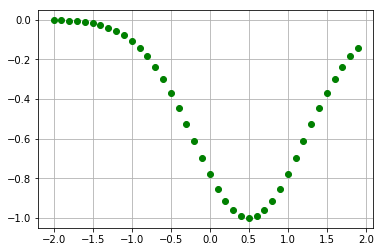

In [128]:
plt.plot(x,potential(x),'go')
plt.grid()

now we try out the scipy.optimize.minimize_scalar function

In [129]:
from scipy import optimize

In [130]:
optimize.minimize_scalar(potential)

     fun: -1.0
    nfev: 7
     nit: 6
 success: True
       x: 0.50000000586701021

but what if we have now more than one variable?

In [131]:
fminimum=optimize.minimize(potential,1)

In [132]:
fminimum

      fun: -0.9999999999957379
 hess_inv: array([[ 0.50046437]])
      jac: array([  4.14252281e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([ 0.50000206])

In [133]:
def potential(x):
    return -np.exp(-(x[0]-x[1]-0.5)**2)

In [134]:
init=[0,0]

In [135]:
fminimum=optimize.minimize(potential,init)

In [136]:
fminimum

      fun: -0.9999999999999976
 hess_inv: array([[ 0.62507533,  0.37492482],
       [ 0.37492482,  0.62507502]])
      jac: array([  1.11758709e-07,  -8.19563866e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 0.24999999, -0.25000006])

In [137]:
fminimum.x

array([ 0.24999999, -0.25000006])

### Demo 2: constrained optimization problems


we take the function $f(x_1,x_2)=x_1^2\cdot x_2$

with constrained conditions: $0<x_1<1$ and $-2<x_2<2$

In [138]:
func = lambda x: -1*x[0]**2*x[1]

defining our bounds for $x_1$ and $x_2$. If there is no upper or lower limit "None", or "np.inf", "-np.inf"

In [139]:
bounds = ([0,2],[-2,2])

if we wanna have now also the condition: $x + y = 0.5$

we add a linear condition to the constraints

constraints are always of the form: cons = [{"type":"ineq","fun": constr_fun},{...}]

whereas the constr_fun is of the form: constr_fun$\geq 0$

In [140]:
lin_constraint = [{'type':'ineq','fun': lambda x: x[0]+x[1]-3},
                  {'type':'ineq','fun': lambda x: -x[0]-x[1]+3}]

result = optimize.minimize(function,initial point,constraints=lin_constraint,bounds=bounds)

In [141]:
init = [0,0]

In [142]:
result = optimize.minimize(func,init,constraints=lin_constraint,bounds=bounds)

In [143]:
print(result)

     fun: -3.999999999999133
     jac: array([-4.00000006, -4.        ])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 2.,  1.])


we could also extend the example with nonlinear constraints instead of the linears..., but that would mean more work.. so

## Conclusion